# Erwan LeCun
## PUI_HW4-3_ErwanLeCun

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import os
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201501-citibike-tripdata.csv")
df_jan = pd.read_csv(citibike_csv)

r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201502-citibike-tripdata.csv")
df_feb = pd.read_csv(citibike_csv)

r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201503-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201503-citibike-tripdata.csv")
df_mar = pd.read_csv(citibike_csv)

r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201506-citibike-tripdata.csv")
df_jun = pd.read_csv(citibike_csv)

r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201507-citibike-tripdata.csv")
df_jul = pd.read_csv(citibike_csv)

r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201508-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201508-citibike-tripdata.csv")
df_aug = pd.read_csv(citibike_csv)

In [3]:
df_jan = df_jan.append(df_feb, ignore_index = True)
df_jan = df_jan.append(df_mar, ignore_index = True)

df_jun = df_jun.append(df_jul, ignore_index = True)
df_jun = df_jun.append(df_aug, ignore_index = True)

df_All = df_jun.append(df_jan, ignore_index = True)
df_W = df_jan
df_S = df_jun

In [4]:
df_W['age'] = 2015 - df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015 - df_S['birth year'][(df_S['usertype'] == 'Subscriber')]
df_All['age'] = 2015 - df_All['birth year'][(df_All['usertype'] == 'Subscriber')]

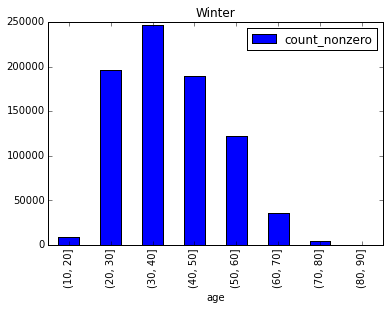

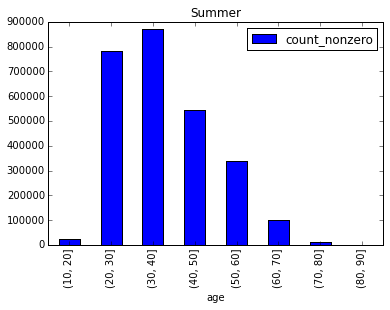

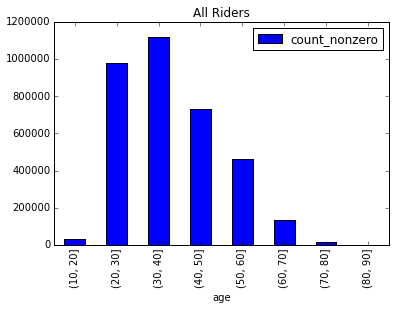

In [5]:
bins = np.arange(10, 99, 10)

df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])

df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

df_All.age.groupby(pd.cut(df_All.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All Riders")
All_age_dist = df_All.age.groupby(pd.cut(df_All.age, bins)).agg([count_nonzero])

#### For the summer months, a notable difference to the winter months is that there seems to be a higher proportion of younger riders (20 - 30) compared to older riders (40 - 50).
#### The All Riders distribution seems to be distributed relatively closely to the summer riders distribution.

In [6]:
ageWtemp = df_W.age
ageStemp = df_S.age
ageAlltemp = df_All.age

ageWtemp = ageWtemp[np.logical_not(np.isnan(ageWtemp))]
ageStemp = ageStemp[np.logical_not(np.isnan(ageStemp))]
ageAlltemp = ageAlltemp[np.logical_not(np.isnan(ageAlltemp))]

In [ ]:
#compare to normal

ksW = scipy.stats.kstest(W_age_dist, 'norm')
ksS = scipy.stats.kstest(S_age_dist, 'norm')
ksAll = scipy.stats.kstest(All_age_dist, 'norm')

print "KS Test:"
print ""
print "winter, normal fit", ksW
print "summer, normal fit", ksS
print "all riders, normal fit", ksAll

KS Test:

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
all riders, normal fit (1.0, 0.0)


##KS Test: 
####Null Hypothesis: the two distributions are drawn from the same parent distribution.
####Alternative Hypothesis: the two distributions are not drawn from the same parent distribution.
## Winter on Normal:
####We reject the null hypothesis that the two distributions are drawn from the same parent distribution. (Low p-value)
## Summer on Normal:
####We reject the null hypothesis that the two distributions are drawn from the same parent distribution. (Low p-value)
## All Riders on Normal:
####We reject the null hypothesis that the two distributions are drawn from the same parent distribution. (Low p-value)

In [ ]:
adW = scipy.stats.anderson(ageWtemp, 'norm')
adS = scipy.stats.anderson(ageStemp, 'norm')
adAll = scipy.stats.anderson(ageAlltemp, 'norm')

print "AD Test:"
print ""
print "winter, normal fit", adW
print "summer, normal fit", adS
print "all riders, normal fit", adAll
print ""

## Anderson-Darling Test: 
####Null Hypothesis: the sample data is derived from a specific input distribution.
####Alternative Hypothesis: the sample data is not derived from a specific input distribution.
## Winter on Normal:
####We reject the null hypothesis that this sample data (winter) is derived from a specific input distribution (normal). (Very high AD coefficient)
## Summer on Normal:
####We reject the null hypothesis that this sample data (summer) is derived from a specific input distribution (normal). (Very high AD coefficient)
## All Riders on Normal:
####We reject the null hypothesis that this sample data (all riders) is derived from a specific input distribution (normal). (Very high AD coefficient)

In [ ]:
#compare to logistic 

ksW = scipy.stats.kstest(W_age_dist, 'logistic')
ksS = scipy.stats.kstest(S_age_dist, 'logistic')
ksAll = scipy.stats.kstest(All_age_dist, 'logistic')

print "KS Test:"
print ""
print "winter, logistic fit", ksW
print "summer, logistic fit", ksS
print "all riders, logistic fit", ksAll

##KS Test: 
####Null Hypothesis: the two distributions are drawn from the same parent distribution.
####Alternative Hypothesis: the two distributions are not drawn from the same parent distribution.
## Winter on Logistic:
####We reject the null hypothesis that the two distributions are drawn from the same parent distribution. (Low p-value)
## Summer on Logistic:
####We reject the null hypothesis that the two distributions are drawn from the same parent distribution. (Low p-value)
## All Riders on Logistic:
####We reject the null hypothesis that the two distributions are drawn from the same parent distribution. (Low p-value)

In [ ]:
adW = scipy.stats.anderson(ageWtemp, 'logistic')
adS = scipy.stats.anderson(ageStemp, 'logistic')
adAll = scipy.stats.anderson(ageAlltemp, 'logistic')

print "AD Test"
print ""
print "winter, logistic fit", adW
print "summer, logistic fit", adS
print "all riders, logistic fit", adAll
print ""

## Anderson-Darling Test: 
####Null Hypothesis: the sample data is derived from a specific input distribution.
####Alternative Hypothesis: the sample data is not derived from a specific input distribution.
## Winter on Logistic:
####We reject the null hypothesis that this sample data (winter) is derived from a specific input distribution (logistic). (Very high AD coefficient)
## Summer on Logistic:
####We reject the null hypothesis that this sample data (summer) is derived from a specific input distribution (logistic). (Very high AD coefficient)
## All Riders on Logistic:
####We reject the null hypothesis that this sample data (all riders) is derived from a specific input distribution (logistic). (Very high AD coefficient)

# Conclusion:
#### For either the KS test or the AD test, and for either the normal distribution or the logistic distribution, we reject the null hypotheses.
#### Each KS test yielded low p-values, indicating that the data was not drawn from the same distribution as either a normal or a logistic regression.
#### Each AD test yielded high AD coefficients, indicating that the data was not derived from either the normal or logistic distributions.
#### The normal distribution seemed to be an equally bad fit compared to the logistic distribution.